This project consist in visualizing data from Colorno site. Data are the results of ERT tests. The site is the portion of an embankment that has been reconstructed after a flood event. The old portion partially collapsed due to a filtration process happened from below. A continuous monitoring is performed since december 2018 in the longitudinal direction. It is also present the data along the transversal direction for standalone tests made on the date ?????????????? and ????????????. 
Data goes from the surface to bottom and from left to right. 

ERT experiment :
The method of measuring subsurface resistivity involves placing four (or more) electrodes in the ground in a line at equal spacing, applying a measured AC current to the outer two electrodes, and measuring the AC voltage between the inner two electrodes. A measured resistance is calculated by dividing the measured voltage by the measured current. This resistance is then multiplied by a geometric factor that includes the spacing between each electrode to determine the apparent resistivity.

ERT specifications :
Electrode spacings of 0.75, 1.5, 3.0, 6.0, and 12.0 m are typically used for shallow depths (<10 m) of investigations. Greater electrode spacings of 1.5, 3.0, 6.0, 15.0, 30.0, 100.0, and 150.0 m are typically used for deeper investigations. The depth of investigation is typically less than the maximum electrode spacing.


In [2]:
a='hello'

        x     z Data  2018-12-06 00:00:00  2018-12-07 00:00:00  \
0     3.0   1.0  NaN                58.00                58.10   
1     9.0   1.0  NaN                66.00                66.10   
2    15.0   1.0  NaN                60.57                60.70   
3    21.0   1.0  NaN                70.67                70.60   
4    27.0   1.0  NaN                60.60                60.80   
..    ...   ...  ...                  ...                  ...   
355  50.0  14.0  NaN                29.27                29.50   
356  52.0  14.0  NaN                29.50                29.43   
357  45.0  15.0  NaN                29.97                29.90   
358  47.0  15.0  NaN                29.00                29.20   
359  49.0  15.0  NaN                30.40                30.43   

     2018-12-08 00:00:00  2018-12-09 00:00:00  2018-12-10 00:00:00  \
0                  29.00                58.20                29.20   
1                  33.00                66.43                33.40 

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


                   Orario Colorno Aipo - Idrometro Torrente Parma - 44852 (m)  \
0     2017-01-01 00:00:00                                                0.6    
1     2017-01-01 01:00:00                                               0.61    
2     2017-01-01 02:00:00                                               0.61    
3     2017-01-01 03:00:00                                               0.61    
4     2017-01-01 04:00:00                                               0.61    
...                   ...                                                ...    
66307 2024-07-25 19:00:00                                               0.63    
66308 2024-07-25 20:00:00                                               0.62    
66309 2024-07-25 21:00:00                                               0.63    
66310 2024-07-25 22:00:00                                               0.62    
66311 2024-07-25 23:00:00                                               0.62    

      Variazione  Valore as

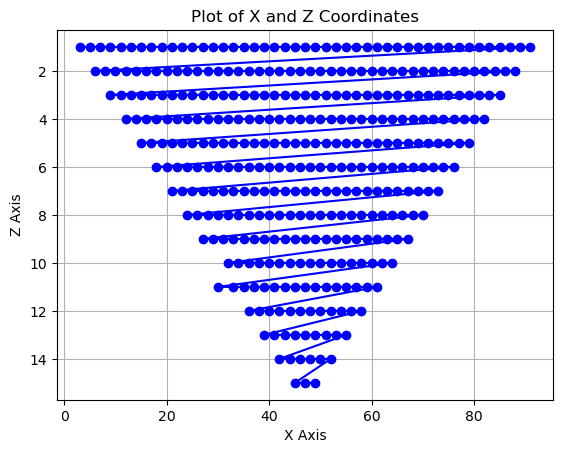

In [3]:
import pandas as pd
import numpy as np
import os
import datetime

# Find the location of OneDrive
one_drive_path = None
for root, dirs, files in os.walk(os.path.expanduser('~')):
    if 'OneDrive' in dirs:
        one_drive_path = os.path.join(root, 'OneDrive')
        break

if one_drive_path is None:
    raise FileNotFoundError("OneDrive not found")

# Find the Regularization folder within OneDrive
path = None
name_folder='ERT_Colorno'
for root, dirs, files in os.walk(one_drive_path):
    if name_folder in dirs:
        path = os.path.join(root, name_folder)
        break

if path is None:
    raise FileNotFoundError("Folder not found in OneDrive")

# Read the Excel file into a DataFrame
filename='Dati_APP_Colorno.xlsx'
filepath = path + '/' + filename
df = pd.read_excel(filepath, header=0)

# Remove rows 360 to 368 from the DataFrame
df.drop(df.index[360:369], inplace=True)

# Print the DataFrame
print(df)

# Get the dates column
dates=df.columns[4:]

# Read another Excel file into a separate DataFrame
filename_meteo='Dati_Meteo_Colorno.xlsx'
filepath_meteo = path + '/' + filename_meteo
df_meteo = pd.read_excel(filepath_meteo, header=0)

# Keep only columns 1 to 7 in df_meteo
df_meteo = df_meteo.iloc[:,:7]

# Print the second DataFrame
print(df_meteo)
# Get the dates column
dates_meteo=df_meteo.columns[4:]

# Read another Excel file into a separate DataFrame
filename_river='Livelli_Parma.xlsx'
filepath_river = path + '/' + filename_river
df_hydrom = pd.read_excel(filepath_river, header=0)

# Keep only columns 1 to 5 in river_hydro
df_hydrom = df_hydrom.iloc[:,:4]

# Print the third DataFrame
print(df_hydrom)
# import pandas as pd
# 
# 
# def read_and_process_data(base_path, file_name, num_columns_to_keep):
#     file_path = f'{base_path}/{file_name}'
#     df = pd.read_excel(file_path, header=0)
# 
#     # If necessary, remove some rows
#     if file_name == 'Dati_APP_Colorno.xlsx':
#         df.drop(df.index[360:369], inplace=True)
# 
#     # Keep only specified number of columns
#     df = df.iloc[:, :num_columns_to_keep]
# 
#     print(df)
#     return df
# 
# 
# path = 'path_to_directory'
# 
# num_columns_to_keep = {'Dati_APP_Colorno.xlsx': len(df.columns),
#                        'Dati_Meteo_Colorno.xlsx': 7,
#                        'Livelli_Parma.xlsx': 4}
# 
# files = ['Dati_APP_Colorno.xlsx', 'Dati_Meteo_Colorno.xlsx', 'Livelli_Parma.xlsx']
# 
# df_map = {}
# for file in files:
#     df_map[file] = read_and_process_data(path, file, num_columns_to_keep[file])
# 
# columns_after_processing = {file: df.columns[4:] for file, df in df_map.items()}

def moving_average(df_func, window_size):
    """
    Calculate the moving average of a Pandas DataFrame, excluding non-numeric data.

    Parameters:
    - df (Pandas DataFrame): Input DataFrame
    - window_size (int): Window size for the moving average

    Returns:
    - Pandas Series: Moving average of the input DataFrame
    """
    # Select only numeric columns
    numeric_df = df_func.select_dtypes(include=[np.number])

    # Calculate the moving average
    moving_avg = numeric_df.rolling(window=window_size).mean()

    return moving_avg

# Calculate daily averages
df_meteo_daily_avg=moving_average(df_meteo, 144)
 
df_hydrom_daily_avg=moving_average(df_hydrom, 25)

# Print the daily averages
print("Daily averages of df_meteo:")
print(df_meteo_daily_avg)
print("Daily averages of df_hydrom:")
print(df_hydrom_daily_avg)
import matplotlib.pyplot as plt

# Assuming your data is stored in a Pandas DataFrame called 'df'
x = df.iloc[:, 0]  # First column
z = df.iloc[:, 1]  # Second column
# print(x) ; print(z)
plt.plot(x, z, 'bo-')  # 'bo-' represents blue circles with solid lines
plt.xlabel('X Axis') 
plt.ylabel('Z Axis')  
plt.gca().invert_yaxis()  # Reverse the z-axis
plt.title('Plot of X and Z Coordinates')
plt.grid()
#plt.show()
#Rearrange data to show sections of data as couloured maps. axis are x and z
# Assuming your data is stored in a Pandas DataFrame called 'df'
x = df.iloc[:, 0]  # First column
z = df.iloc[:, 1]  # Second column

Xx, Zz = np.meshgrid(x,z)
# Show distribution of coordinates - a triangle that goes 14m deep for a 80m line of ERT test
# This is typical of an ERT experiment as increasing the length of the experiment allows to receive data from deeper in the soil.
# Data seems to contain an error along the line z=11m. The first point of the line should be placed ad z=10m?
# Initialize an empty list to store the 2D sections
sections = []

# Get the index of July 17, 2024
july_17_index = df.columns.get_loc(datetime.datetime(2024, 7, 17))

# Create a new DataFrame df_july24 with data until July 17, 2024
df_july24 = df.iloc[:, 3:july_17_index]

# Loop through each column of numerical data in the DataFrame
for i in range(3, july_17_index):
    column_name = df.columns[i]
    
    # Extract the column data
    y = df.iloc[:, i]
    
    # Create a 2D section with data x, z, and the column index
    section = y
    
    # Append the section to the list
    sections.append(section)

# Print the number of sections
print(f"Number of sections: {len(sections)}")

# Print the shape of the new DataFrame df_july24
print(f"Shape of df_july24: {df_july24.shape}")

# You can now use the sections list to create colored maps or perform further analysis
# and use df_july24 for analysis until July 17, 2024

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import style
from matplotlib.widgets import Slider
import matplotlib as mpl
import matplotlib.patches as patches
import math

#Magic what?
%matplotlib notebook

#To sketch fast and to close all precedent
style.use('fast')
style.use('default')
plt.close('all')

# assume x, z, and sections are defined elsewhere in your code
x_grid, z_grid = np.meshgrid(np.sort(x), z)

def create_figure(x, z, sections, fig_size=(15, 4.5), bottom=0.2):
    fig, ax = plt.subplots(figsize=fig_size)
    plt.subplots_adjust(bottom=bottom)
    return fig, ax

def create_slider(ax, label, valmin, valmax, valinit, slider_ax_size):
    slider_ax = plt.axes(slider_ax_size)
    slider = Slider(slider_ax, label, valmin, valmax, valinit=valinit, valstep=1)
    return slider_ax, slider

def add_patches(slider_ax, sections):
    start_idx = None
    for i, section in enumerate(sections):
        if np.isnan(section).any():
            if start_idx is None:
                start_idx = i
        else:
            if start_idx is not None:
                rect = patches.Rectangle((start_idx, 0), i - start_idx, 0.65, 
                                         linewidth=1, edgecolor='white', facecolor='white')
                slider_ax.add_patch(rect)
                start_idx = None
    if start_idx is not None:
        rect = patches.Rectangle((start_idx, 0), len(sections) - start_idx, 0.65, 
                                 linewidth=1, edgecolor='white', facecolor='white')
        slider_ax.add_patch(rect)
    return slider_ax

def create_apparent_resistivity_plot(x, z, sections, x_grid, z_grid, title):
    
    fig, ax = create_figure(x, z, sections)  # Decrease the bottom margin
  
    data = griddata((x, z), sections[0], (x_grid, z_grid), method='cubic')
    im = plt.pcolormesh(x_grid, z_grid, data, cmap='viridis')
    # cbar = plt.colorbar(im, orientation='horizontal')
    cbar = plt.colorbar(im, orientation='horizontal', shrink=0.3)
    plt.xlabel('X [m]')
    plt.ylabel('Z [m]')
    plt.gca().invert_yaxis()
    plt.title(title)
    ax.set_aspect('equal', adjustable='box')

    text_box = ax.text(5, 13, '', fontsize=11)
    mean_value_text = f'Mean p = {np.mean(sections[0]):.2f}'
    text_box.set_text(mean_value_text)

    std_dev_text_box = ax.text(60, 13, '', fontsize=11)
    std_dev_text = f'Std dev p = {np.std(sections[0]):.2f}'
    std_dev_text_box.set_text(std_dev_text)
    
    slider_ax, slider = create_slider(ax, 'Date', 0, len(sections) - 1, 0, [0.15, 0.15, 0.65, 0.05])  # Decrease the slider size
    years = list(set([col.year for col in df_july24.columns[4:]]))
    indices = list(set([df_july24.columns.get_loc(col) for col in df_july24.columns[4:]]))
    slider_labels = [f'{year + 1}' for year in years]
    # #years = list(set([col.year for col in df_july24.columns.year]))
    # # Get indices of years in df_july24
    # dates_pd = pd.to_datetime(dates.year)
    # indices = [df_july24.columns.get_loc(col) for col in dates_pd if col.year in years]
        
    #create a custom axis for the slider with year labels
    slider_ax.set_xticks(np.linspace(24, len(sections) - 1, len(years)-1))  # set xticks for the slider
    slider_ax.set_xticklabels(slider_labels[0:-1])  # set xticklabels for the slider
    slider_ax.set_xlim(0, len(sections) - 1)  # set x-axis limits
    #slider_ax.set_facecolor('black')  # set background color
    slider_ax.tick_params(axis='x', colors='black')  # set tick color
    slider_ax_rect = add_patches(slider_ax, sections)
    slider.valtext.set_text(df.columns[0 + 4])
    
    # creating a new axis for years in the same location as the slider
    year_ax = fig.add_axes(slider_ax.get_position(), frame_on=False)
    year_ax.xaxis.tick_top()
    year_ax.xaxis.set_label_position('top')
    year_ax.set_xticks(
        years[0:-1])  # assuming slider.vals is a list or array of positions where you want the year labels to be
    year_ax.set_xticklabels(years[0:-1])  # assuming 'years' is a list or array of year values
    year_ax.tick_params(labeltop=False, labelright=False, labelleft=False, labelbottom=False)  # remove the labels

    slider_ax.set_visible(True)  # make the original slider axis invisible
    
    return fig, ax, im, cbar, text_box, std_dev_text_box, slider

title ='Colormap of apparent resistivity in [Ohm-m] - p -'
fig, ax, im, cbar, text_box, std_dev_text_box, slider = create_apparent_resistivity_plot(x, z, sections, x_grid, z_grid, title)
title ='Second Colormap of apparent resistivity in [Ohm-m] - p -'
fig1, ax1, im1, cbar1, text_box1, std_dev_text_box1, slider1 = create_apparent_resistivity_plot(x, z, sections, x_grid, z_grid,title)
title ='Colormap of the daily change in percentage of apparent resistivity in [%] - p -'
diff_secs = [100*(sections[i+1] - sections[i])/(sections[i]+0.0001) for i in range(len(sections) - 1)]
diff_secs.append([np.nan] * len(sections[0]))
fig2, ax2,im2 ,cbar2, text_box2, std_dev_text_box2, slider2= create_apparent_resistivity_plot(x, z,diff_secs, x_grid, z_grid,title)

#i_fixed=[]

def update(val, im, cbar, text_box, std_dev_text_box, sections, slider):
    global i_fixed
    i_update = int(val)
    
    data_update = griddata((x, z), sections[i_update], (x_grid, z_grid), method='cubic')
    im.set_array(data_update)
    if not(np.isnan(sections[i_update]).any()):
        min_ten = math.floor(min(sections[i_update]) / 10) * 10
        max_ten = math.ceil(max(sections[i_update]) / 10) * 10
        cbar_ticks = np.linspace(min_ten, max_ten, num=11, endpoint=True)
        if max_ten <= 10:
            min_ten = min(sections[i_update])
            max_ten = max(sections[i_update])
            cbar_ticks = np.linspace(min_ten, max_ten, num=6, endpoint=True)
        cbar.set_ticks(cbar_ticks)
        im.set_clim(vmin=min(sections[i_update]), vmax=max(sections[i_update]))
        mean_value_text = f'Mean p = {np.mean(sections[i_update]):.2f}'
        std_dev_text = f'Std dev p = {np.std(sections[i_update]):.2f}'
    else:
        mean_value_text = 'Nan'
        std_dev_text = 'Nan'
    text_box.set_text(mean_value_text)
    std_dev_text_box.set_text(std_dev_text)
    slider.valtext.set_text(df.columns[i_update + 4])
    # if i_fixed != i_update :
    #     
    #     i_fixed=i_update
    
slider.on_changed(lambda val: update(val, im, cbar, text_box, std_dev_text_box, sections,slider))
slider1.on_changed(lambda val: update(val, im1, cbar1, text_box1, std_dev_text_box1, sections,slider1))
slider2.on_changed(lambda val: update(val, im2, cbar2, text_box2, std_dev_text_box2, diff_secs,slider2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0